In [10]:
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [33]:
#1. Вивести перших 5 рядків.(та завантажити датасет)
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [34]:
# 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
missing_values = df.isnull().sum()
print("Пропущені значення :\n", missing_values)

Пропущені значення :
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [35]:
#3. Перевірити наявність дублікатів, при виявленні – видалити.
duplicates = df.duplicated().sum()
print("\nКількість дублікатів:", duplicates)


Кількість дублікатів: 1


In [36]:
#Видалення дублікатів
df = df.drop_duplicates()

In [37]:
#4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.
unique_values = df['sex'].unique()
print(unique_values)

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})




['Female', 'Male']
Categories (2, object): ['Male', 'Female']


In [38]:
#5. Перевірити тип даних. При необхідності замінити тип даних на числовий.
data_types = df.dtypes

print("\nТипи даних:\n", data_types)


Типи даних:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [39]:
print(df.head())

   total_bill   tip sex smoker day time  size
0       16.99  1.01   0      0   3    1     2
1       10.34  1.66   1      0   3    1     3
2       21.01  3.50   1      0   3    1     3
3       23.68  3.31   1      0   3    1     2
4       24.59  3.61   0      0   3    1     4


In [40]:
# Перетворення категоріальних змінних на числові значення
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].astype('category').cat.codes

# Перевірка результату
print(df.dtypes)
print(df)

total_bill    float64
tip           float64
sex              int8
smoker           int8
day              int8
time             int8
size            int64
dtype: object
     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    1       1    3     1     2
1         10.34  1.66    0       1    3     1     3
2         21.01  3.50    0       1    3     1     3
3         23.68  3.31    0       1    3     1     2
4         24.59  3.61    1       1    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    0       1    2     1     3
240       27.18  2.00    1       0    2     1     2
241       22.67  2.00    0       0    2     1     2
242       17.82  1.75    0       1    2     1     2
243       18.78  3.00    1       1    0     1     2

[243 rows x 7 columns]


In [41]:
#6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.Побудувати теплову карту кореляції.
correlation_matrix = df.corr()

tip_correlation = correlation_matrix['tip']

sorted_tip_correlation = tip_correlation.sort_values(ascending=False)

print(sorted_tip_correlation)

tip           1.000000
total_bill    0.674998
size          0.488400
day           0.131798
time          0.117596
smoker       -0.009763
sex          -0.085274
Name: tip, dtype: float64


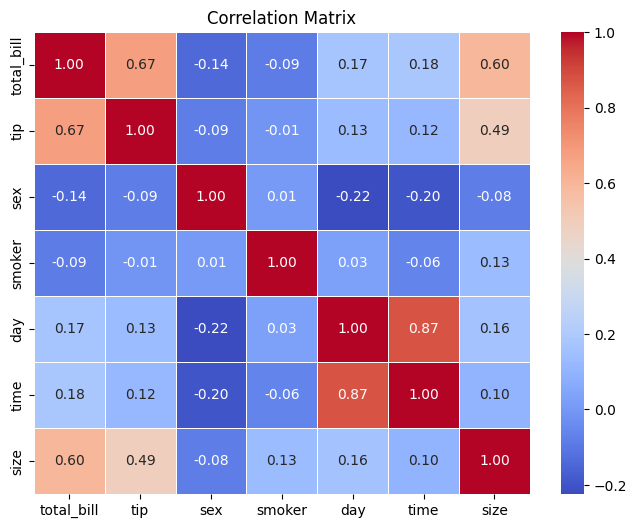

In [42]:
import matplotlib.pyplot as plt
# Візуалізація теплової карти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
#7. Масштабувати ознаки.
X = df.drop(columns=['tip'])  # Виключаємо цільову змінну 'tip'
y = df['tip']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
#8. Поділити дані на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
#9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

Лінійна регресія: MSE = 1.1693237885225933 , R2 = 0.5200756159874647
Random Forest регресія: MSE = 1.2144788108163262 , R2 = 0.5015426856972387


In [50]:
#10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lin)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lin)}")
print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf)}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")

Linear Regression R^2: 0.5200756159874647
Linear Regression MSE: 1.1693237885225933
Random Forest R^2: 0.5015426856972387
Random Forest MSE: 1.2144788108163262


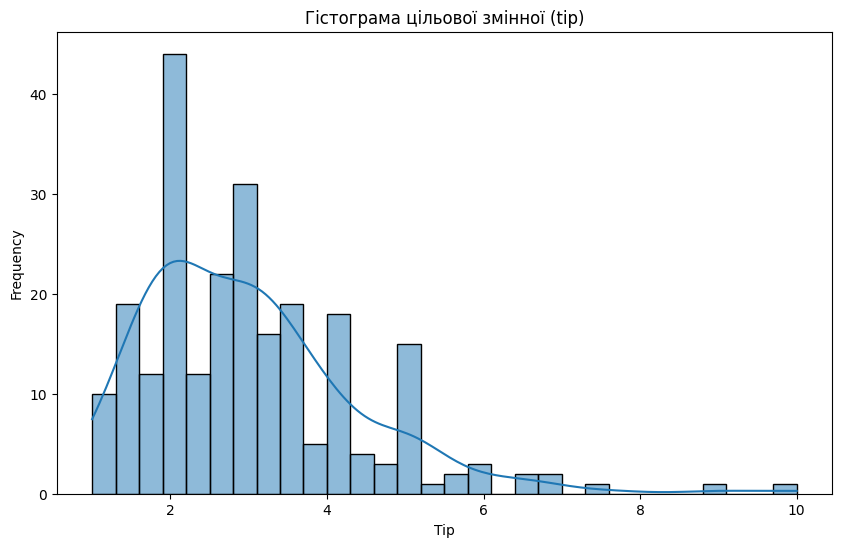

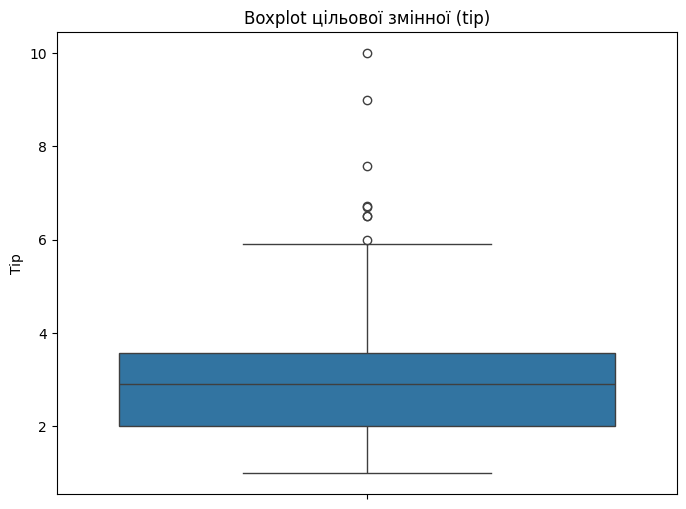

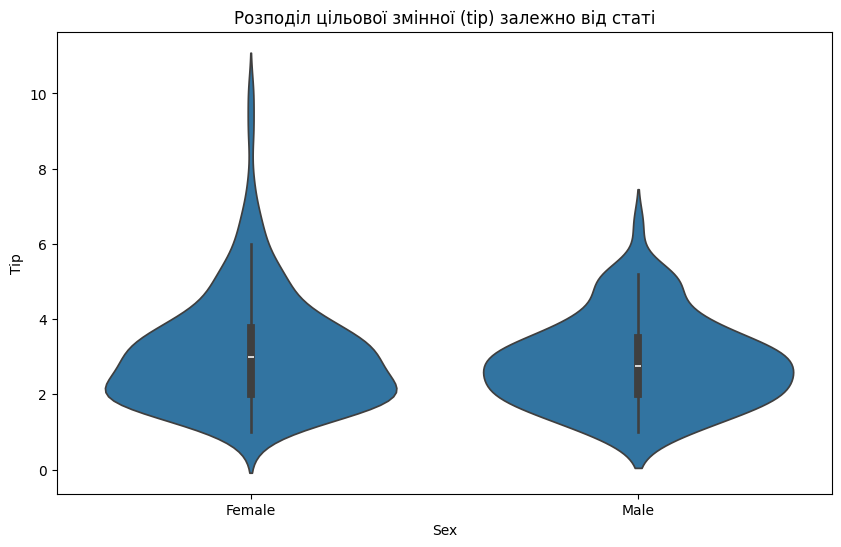

In [51]:
#11. Побудувати графіки.


# Гістограма 
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True, bins=30)
plt.title('Гістограма цільової змінної (tip)')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tip'])
plt.title('Boxplot цільової змінної (tip)')
plt.ylabel('Tip')
plt.show()

# Розподіл цільової змінної залежно від статі
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='tip', data=df)
plt.title('Розподіл цільової змінної (tip) залежно від статі')
plt.xlabel('Sex')
plt.ylabel('Tip')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


In [52]:
#12. Вивести справжні і прогнозовані значення.

print("Справжні і прогнозовані значення (Лінійна регресія):")
results_lin = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_lin})
print(results_lin.head())

print("\nСправжні і прогнозовані значення (RandomForest регресія):")
results_rf = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_rf})
print(results_rf.head())


Справжні і прогнозовані значення (Лінійна регресія):
     Справжні значення  Прогнозовані значення
24                3.18               2.884889
6                 2.00               2.011629
152               2.74               2.949096
233               1.47               2.110732
239               5.92               3.883946

Справжні і прогнозовані значення (RandomForest регресія):
     Справжні значення  Прогнозовані значення
24                3.18                 2.7677
6                 2.00                 2.0366
152               2.74                 2.8760
233               1.47                 2.0215
239               5.92                 3.4231


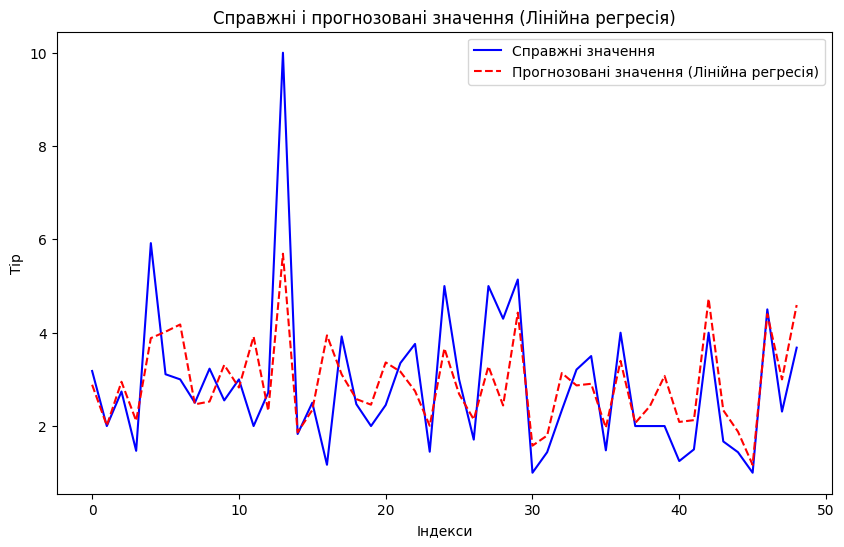

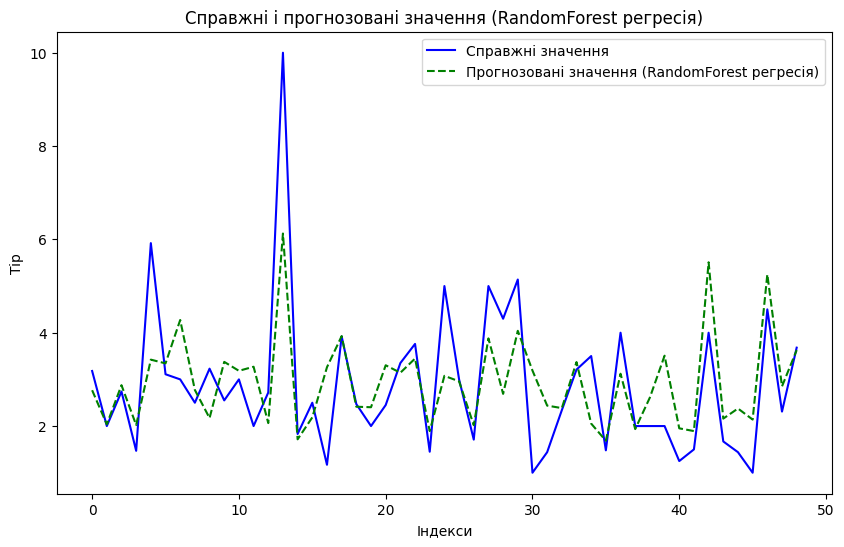

In [53]:
#12. Вивести справжні і прогнозовані значення.

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Справжні значення', color='blue')
plt.plot(y_pred_lin, label='Прогнозовані значення (Лінійна регресія)', color='red', linestyle='--')
plt.title('Справжні і прогнозовані значення (Лінійна регресія)')
plt.xlabel('Індекси')
plt.ylabel('Tip')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Справжні значення', color='blue')
plt.plot(y_pred_rf, label='Прогнозовані значення (RandomForest регресія)', color='green', linestyle='--')
plt.title('Справжні і прогнозовані значення (RandomForest регресія)')
plt.xlabel('Індекси')
plt.ylabel('Tip')
plt.legend()
plt.show()
